<a href="https://colab.research.google.com/github/kunalbathija/Udemy-TF-2.0/blob/master/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5327 - accuracy: 0.8037 - val_loss: 0.4098 - val_accuracy: 0.8449
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3716 - accuracy: 0.8622 - val_loss: 0.3466 - val_accuracy: 0.8699
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3238 - accuracy: 0.8779 - val_loss: 0.3349 - val_accuracy: 0.8780
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2893 - accuracy: 0.8908 - val_loss: 0.3119 - val_accuracy: 0.8887
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2642 - accuracy: 0.9013 - val_loss: 0.3005 - val_accuracy: 0.8905
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2389 - accuracy: 0.9090 - val_loss: 0.2864 - val_accuracy: 0.8960
Epoch 7/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2214 - accuracy: 0.9155 - val_loss: 0.2925 -

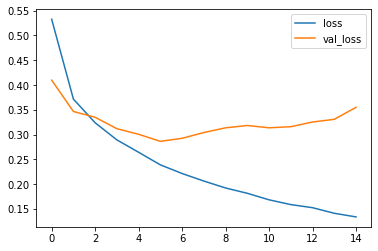

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

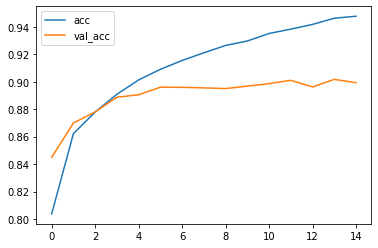

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[866   0  21  14   3   1  90   0   5   0]
 [  2 980   0  10   2   0   5   0   1   0]
 [ 17   3 855  12  50   0  61   0   2   0]
 [ 13  13  21 916  13   1  20   0   3   0]
 [  1   2  62  37 810   0  86   0   2   0]
 [  0   0   0   0   0 969   0  21   2   8]
 [114   2  61  22  73   0 717   0  11   0]
 [  0   0   0   0   0   8   0 968   0  24]
 [  3   2   9   3   4   1   5   3 968   2]
 [  1   0   0   0   0   5   0  49   1 944]]


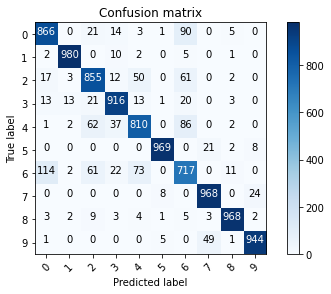

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

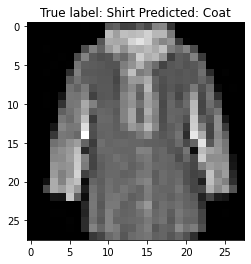

In [18]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));